# <center>HOTEL BOOKING ANALYSIS </center>

## Problem statement
<p>Online hotel reservations are a popular method for booking hotel rooms. Travellers can book rooms on a computer by using online security to protect their privacy and financial information and by using several online travel agents to compare prices and facilities at different hotels.</p>

<p>Prior to the Internet, travellers could write, telephone the hotel directly, or use a travel agent to make a reservation. Nowadays, online travel agents have pictures of hotels and rooms, information on prices and deals, and even information on local resorts. Many also allow reviews of the traveler to be recorded with the online travel agent.</p>

<p>Online hotel reservations are also helpful for making last minute travel arrangements. Hotels may drop the price of a room if some rooms are still available. There are several websites that specialize in searches for deals on rooms.</p>

### Research Questions
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?
### Hypothesis
1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.
## <center>Analysis and Findings</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Lode the dataset 
download dataset from <a href="https://www.kaggle.com/datasets/mojtaba142/hotel-booking">here</a>

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## <center>Exploratory Data Analysis and Data Cleaning  </center>
<p>This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.</p>


In [3]:
print(f"Shape of Dataset {df.shape}")

Shape of Dataset (119390, 36)


In [4]:
print(f"Columns in Dataset: {df.columns}")

Columns in Dataset: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [5]:
print(f"information of dataset {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### summary statistics for objects columns

In [6]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [7]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

['Ernest.Barnes31@outlook.com' 'Andrea_Baker94@aol.com'
 'Rebecca_Parker@comcast.net' ... 'Mary_Morales@hotmail.com'
 'MD_Caroline@comcast.net' 'Ariana_M@xfinity.com']
----------------------------------------------------------------------------------------------------
phone-number
['669-792-1661' '858-637-6955' '652-885-2745' ... '395-518-4100'
 '531-528-1017' '422-804-6403']
----------------------------------------------------------------------------------------------------
credit_card
['************4322' '************9157' '************3734' ...
 '************9170' '************6349' '************7959']
----------------------------------------------------------------------------------------------------


In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(['agent','company'],axis=1, inplace=True)
df.dropna(inplace=True)

#### summary statistics for numeric  columns

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df = df[df['adr']<5000]

## <center>Data Analysis and visualizations </center>

<b> How many percentage are canceled the booking?</b>

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

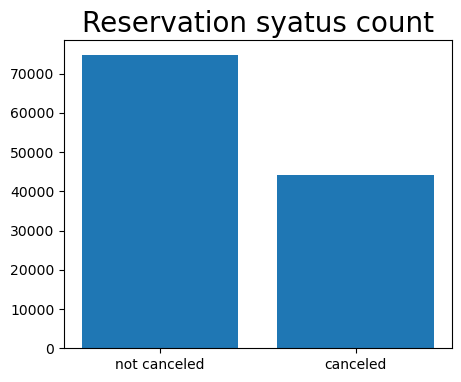

In [12]:
canceled_perc = df['is_canceled'].value_counts(normalize=True)
print(canceled_perc)


plt.figure(figsize=(5,4))
plt.title("Reservation syatus count",size=20)
plt.bar(['not canceled','canceled'],df['is_canceled'].value_counts())

<p> The accompanying bar graph shows the percentage of canceled reservations and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservations, which significantly impacts the hotel's earnings. </p>

<b>Which hotel cancelation ratio are more?</b>

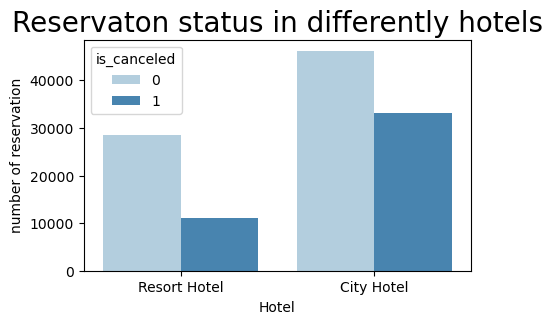

In [13]:
plt.figure(figsize=(5,3))
ax1 = sns.countplot(x = 'hotel', hue='is_canceled', data=df,palette='Blues')
legendlabels,_ = ax1.get_legend_handles_labels()
plt.title("Reservaton status in differently hotels",size=20)
plt.xlabel("Hotel")
plt.ylabel("number of reservation")
plt.show()

<p>In comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities.</p>

In [14]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [15]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [16]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

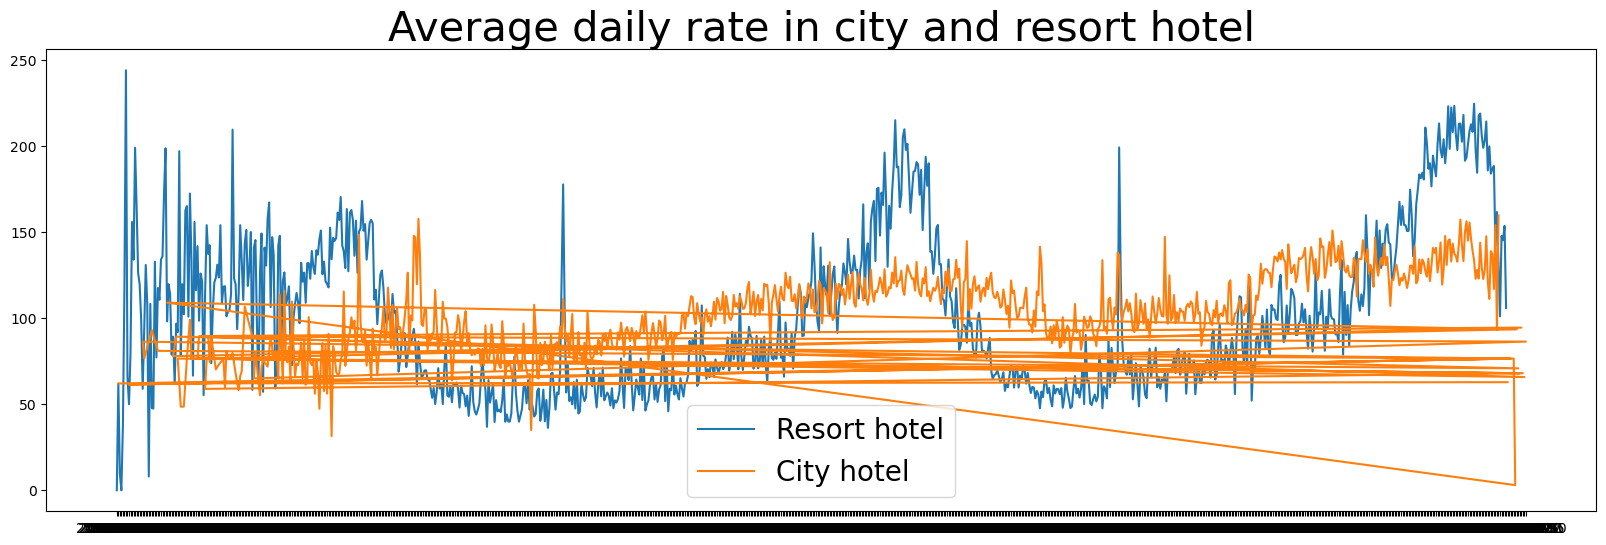

In [17]:
plt.figure(figsize=(20,6))
plt.title("Average daily rate in city and resort hotel",fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label="Resort hotel")
plt.plot(city_hotel.index,city_hotel['adr'],label="City hotel")
plt.legend(fontsize=20)
plt.show()

<p>The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.</p>

In [18]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month

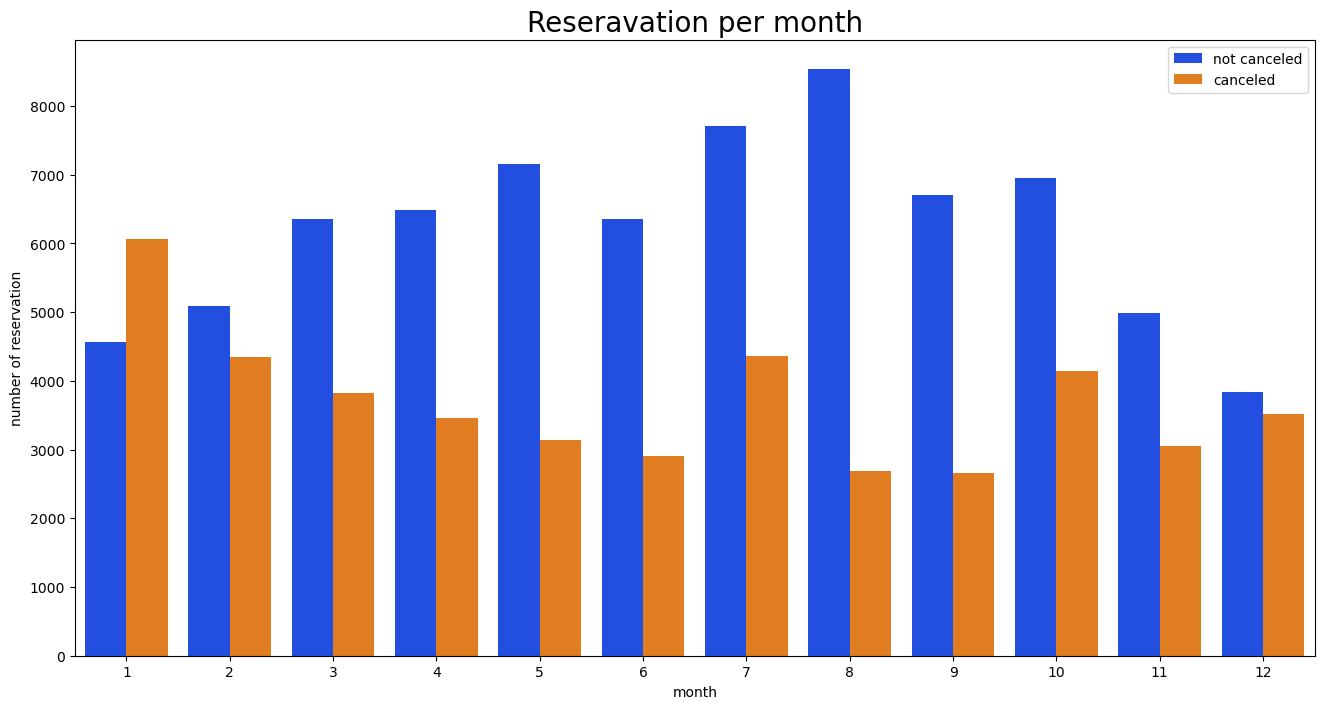

In [19]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x = df['month'],hue='is_canceled',data=df,palette='bright')
plt.title('Reseravation per month',size = 20)
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

<p> We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservations are largest in the month of August. whereas January is the month with the most canceled reservations. </p>

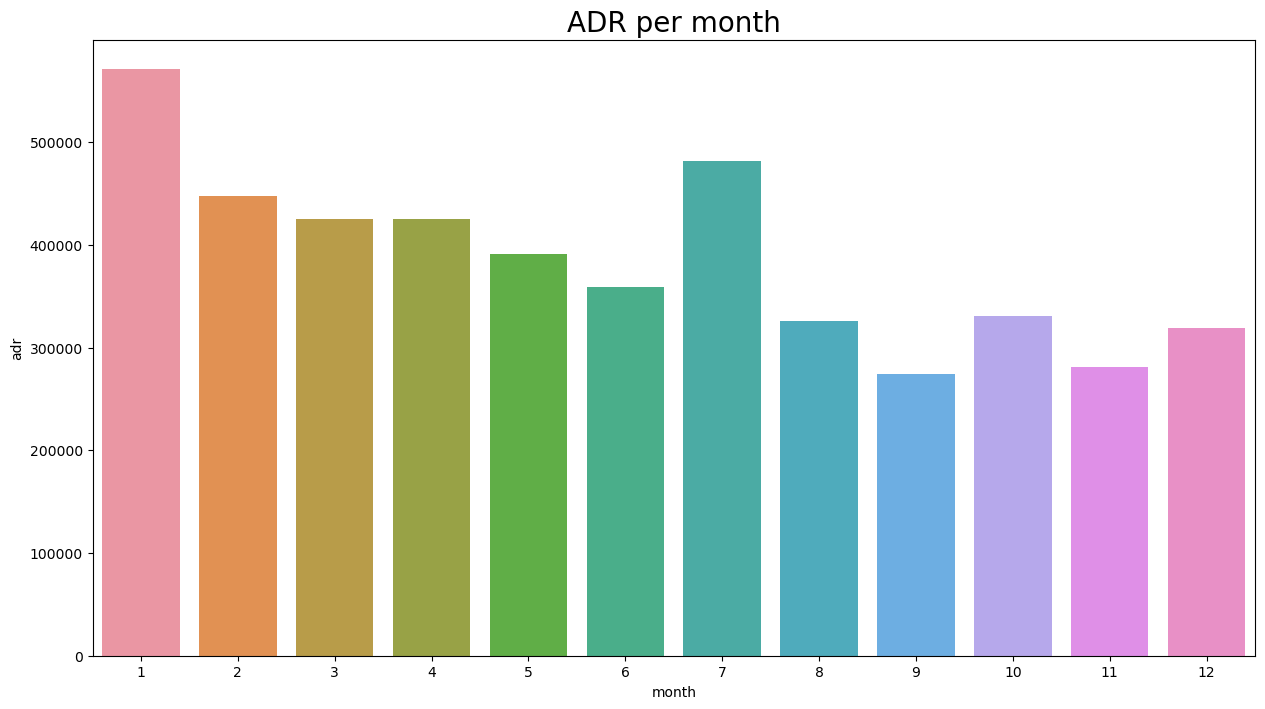

In [20]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=20)
sns.barplot(x='month',y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

<p>This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.</p>
<p>Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.</p>

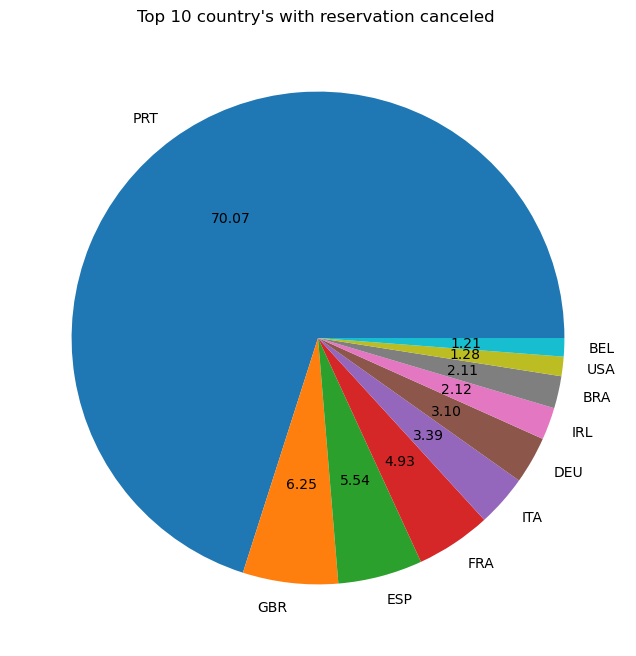

In [21]:
canceled_data = df[df["is_canceled"] == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 country's with reservation canceled ")
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

<p>Let's check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline Travel Agents? Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.</p>

In [22]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [23]:
canceled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

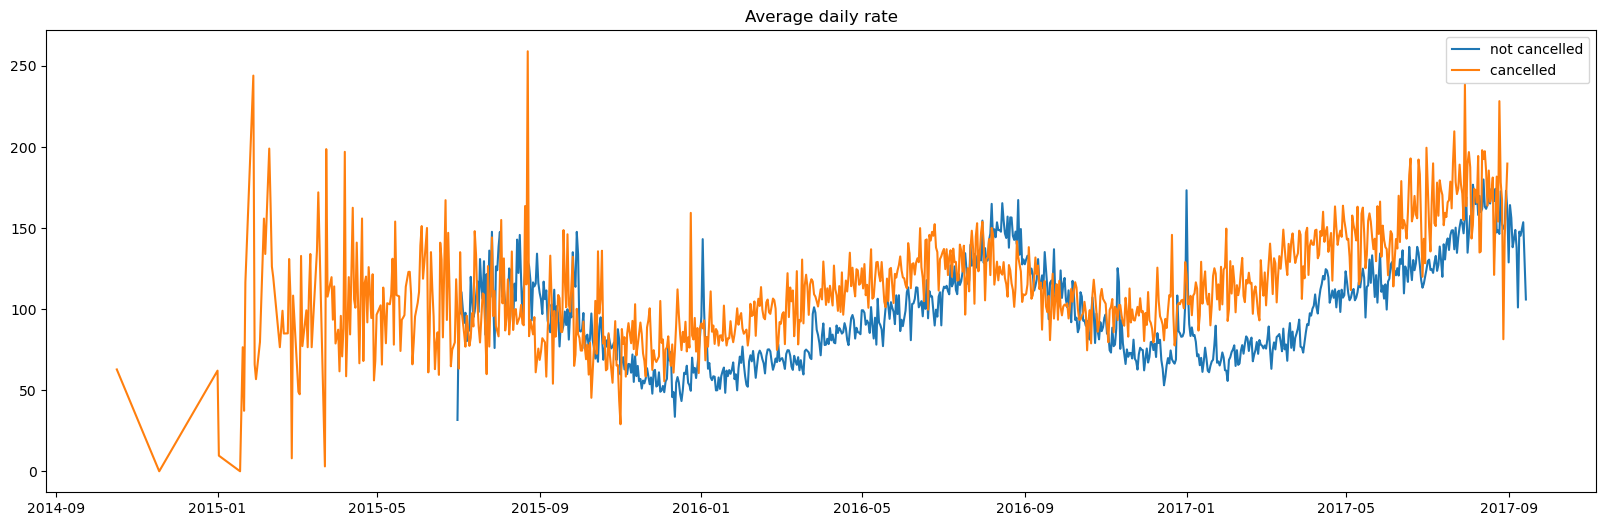

In [24]:
canceled_data =  df[df["is_canceled"] == 1]
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data = df[df["is_canceled"] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average daily rate")
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label='not cancelled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'], label='cancelled ')
plt.legend()
plt.show()

<p>As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.</p>

### <center>Suggestions</center>
    1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.
    2. As the ratio of cancellations and not cancellations of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.
    3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
    4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.